In [1]:
import os
import pandas as pd

In [2]:
import numpy as np

In [6]:
def load_cae_data(path, name):
    path = os.path.join("datasets", path)
    csv_path = os.path.join(path, name)
    return pd.read_csv(csv_path)

cae = load_cae_data("cae", "CAE_dataset.csv")
test_set1 = load_cae_data("cae", "CAE_test_dataset.csv")
cae = cae.loc[:, '0':'Id'];
test_set = test_set1.loc[:, '0':'Id'];

In [7]:
def replace(arr1):
    arr1_cae = arr1
    for x in ["0","1","2","3","4","5","6","7","8","9"]:
        arr1_cae[x] = arr1_cae[x].fillna(arr1_cae[x].median())
def normaliz(arr2):
    arr2_cae = arr2
    for x in ["0","1","2","3","4","5","6","7","8","9"]:
        diff = arr2_cae[x].max()-arr2_cae[x].min()
        arr2_cae[x] = (arr2_cae[x]-(arr2_cae[x].min()))/diff
replace(cae)
normaliz(cae)
# replace(test_set)
# normaliz(test_set)
cae.head()
# test_set.head()

,0,1,2,3,4,5,6,7,8,9,label,Id
0,0.211765,0.873371,0.414132,0.023692,0.506855,0.198238,0.904615,0.499396,0.459829,0.92556,0,327
1,0.211765,0.873580,0.414146,0.023839,0.506071,0.198238,0.912529,0.499415,0.460363,0.92556,0,327
2,0.211765,0.873580,0.414169,0.023854,0.501371,0.197748,0.912529,0.499439,0.461019,0.92556,0,327
3,0.211766,0.873795,0.414191,0.023802,0.501371,0.184043,0.918347,0.499465,0.461781,0.92556,0,327
4,0.211766,0.873795,0.414204,0.023757,0.501371,0.157122,0.921571,0.499491,0.462641,0.92556,0,327


In [5]:
from sklearn.model_selection import train_test_split
cae , test_set = train_test_split(cae, test_size=0.6, random_state=42)
print(len(cae), "train", len(test_set), "test")

154307 train 231461 test


In [8]:
train_set , test_set = train_test_split(cae, test_size=0.2, random_state=42)
print(len(train_set), "train", len(test_set), "test")

308614 train 77154 test


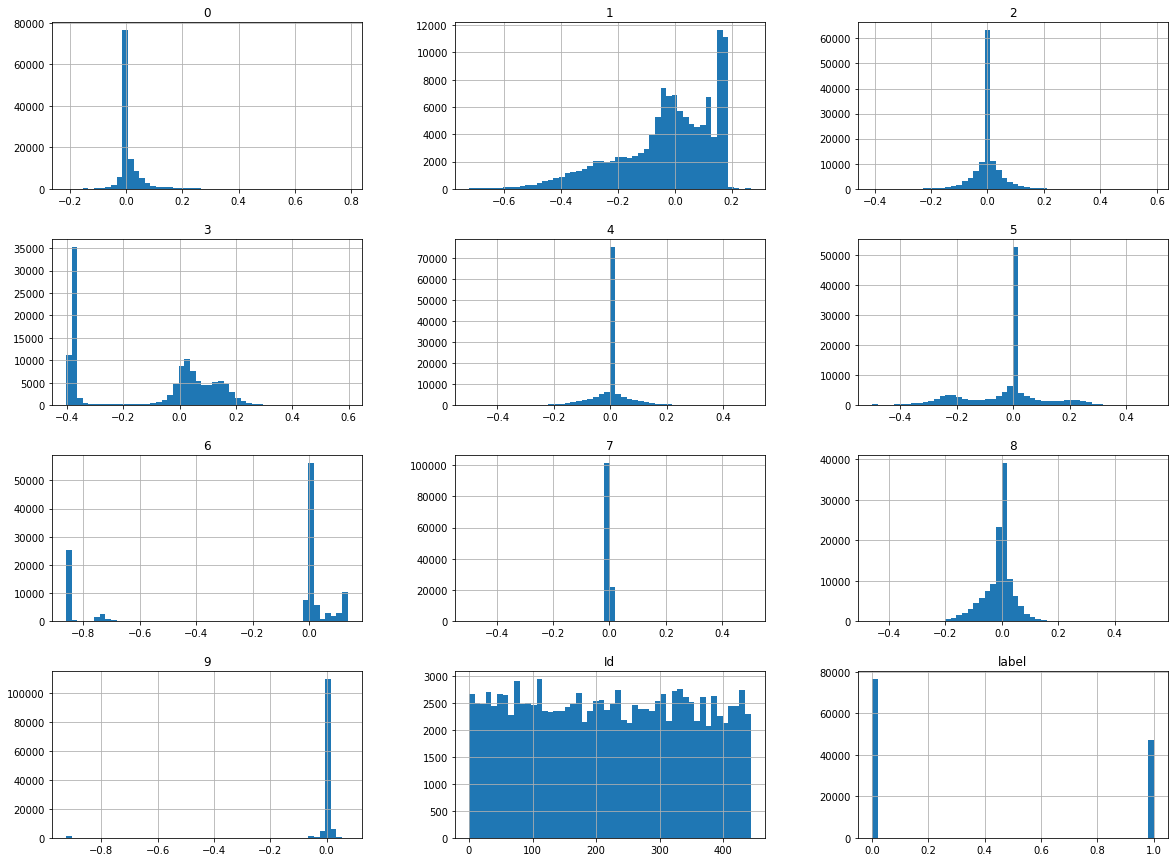

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize= (20,15))
plt.show()

In [9]:
corr_matrix = train_set.corr()
corr_matrix["label"].sort_values(ascending=False)

label    1.000000
0        0.178847
3        0.045940
2        0.037780
Id       0.024580
5        0.011425
9        0.007742
4        0.001945
7       -0.028133
8       -0.055320
1       -0.135749
6       -0.199152
Name: label, dtype: float64

In [10]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E55F51518>,
      dtype=object)

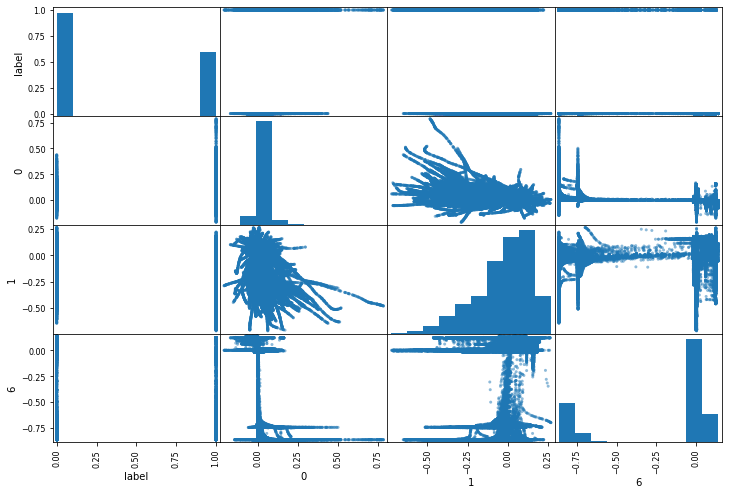

In [182]:
attributes = ["label", "0", "1", "6"]
scatter_matrix(train_set[attributes], figsize=(12,8))

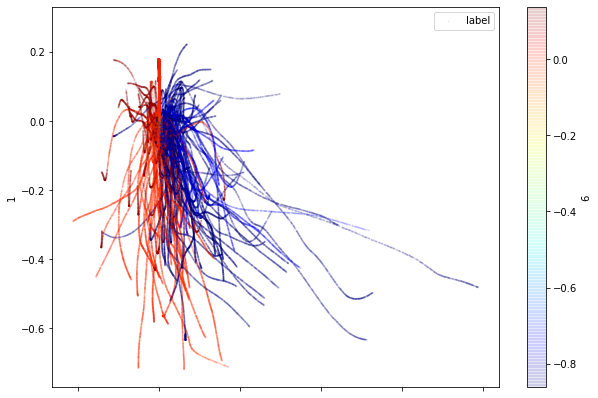

In [275]:
train_set.plot(kind="scatter", x="0", y="1", alpha=0.1, 
             s=train_set["label"], label="label", figsize=(10,7),
            c="6", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

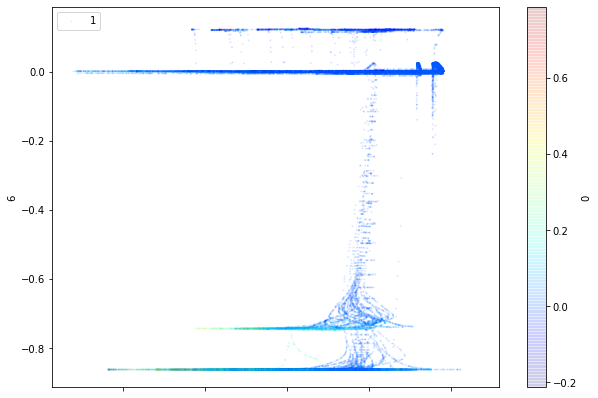

In [177]:
train_set.plot(kind="scatter", x="1", y="6", alpha=0.1, 
             s=train_set["label"], label="1", figsize=(10,7),
            c="0", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [68]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,label,Id
111020,-0.092833,0.078046,0.092361,0.081387,0.000000,-0.006853,0.121527,0.014612,0.021798,-0.020062,0,278
294692,-0.000238,0.105887,-0.003853,-0.379657,0.000000,-0.021537,-0.000231,-0.000269,-0.008337,0.000966,1,417
10016,-0.006885,-0.137699,-0.070155,0.027494,-0.019193,-0.018111,0.000136,-0.003298,-0.051654,0.000363,0,111
67530,-0.003676,0.131432,0.060024,0.148630,0.093615,0.017132,0.122286,0.000719,-0.000009,-0.000130,0,180
23389,0.024473,-0.003713,-0.020347,0.081553,0.000392,0.003916,-0.862093,-0.006674,-0.046692,-0.023107,0,300


In [208]:
train_set_co = train_set.copy()

In [205]:
train_set_co["10"] = train_set["6"]*train_set["1"]*100
med = train_set_co["10"].median()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D86DC6320>,
      dtype=object)

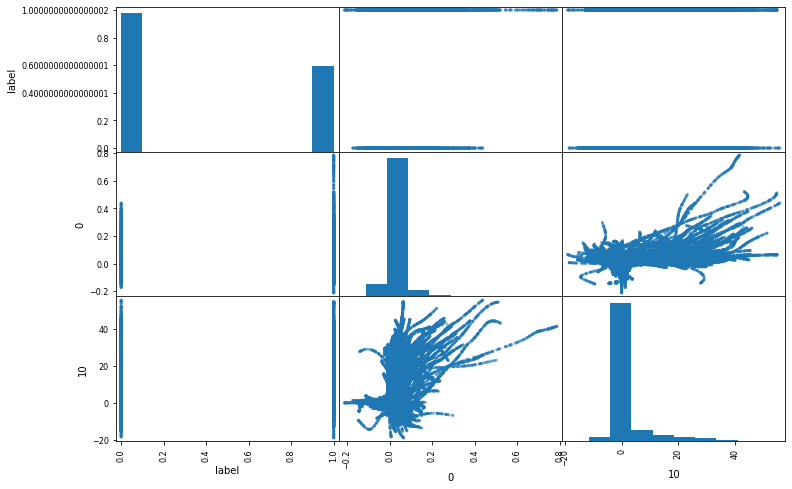

In [207]:
attributes = ["label", "0", "10"]
scatter_matrix(train_set_co[attributes], figsize=(12,8))

In [11]:
train_input_data = pd.concat([train_set["0"], train_set["1"], train_set["6"]], axis=1, keys=['0', '1','6'])
train_output_data = train_set["label"]
test_input_data = pd.concat([test_set["0"], test_set["1"], test_set["6"]], axis=1, keys=['0', '1','6'])
test_output_data = test_set["label"]

In [12]:
train_input_data1 =train_set.loc[:, '0':'9']
train_output_data1 = train_set["label"]
test_input_data1 = test_set.loc[:, '0':'9']
test_output_data1 = test_set["label"]

In [13]:
def myscores(smat): 
    tp = smat[0][0] 
    fp = smat[0][1] 
    fn = smat[1][0] 
    tn = smat[1][1] 
    return tp/(tp+fp), tp/(tp+fn)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
# with column 0,1,6
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 1).fit(train_input_data,train_output_data)
accuracy = knn.score(test_input_data, test_output_data) 
print(accuracy)
knn_predictions = knn.predict(test_input_data)  
cm = confusion_matrix(test_output_data, knn_predictions)
print(cm)
print("precision and recall:", myscores(cm))
pre, rec = myscores(cm)
f1_score = 2*pre*rec/(pre+rec)
print("F1 score : ", f1_score)

0.890621354693211
[[43821  4081]
 [ 4358 24894]]
precision and recall: (0.9148052273391508, 0.9095456526702506)
F1 score :  0.9121678583695008


In [16]:
# for all the columns
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 1).fit(train_input_data1,train_output_data1)
accuracy = knn.score(test_input_data1, test_output_data1) 
print(accuracy)
knn_predictions = knn.predict(test_input_data1)  
cm = confusion_matrix(test_output_data1, knn_predictions)
print(cm)
print("precision and recall:", myscores(cm))
pre, rec = myscores(cm)
f1_score = 2*pre*rec/(pre+rec)
print("F1 score : ", f1_score)

0.9572284003421728
[[46030  1872]
 [ 1428 27824]]
precision and recall: (0.9609202120997036, 0.969910236419571)
F1 score :  0.9653942953020134


In [17]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 30).fit(train_input_data,train_output_data) 
dtree_predictions = dtree_model.predict(test_input_data)
accuracy = dtree_model.score(test_input_data, test_output_data)
print(accuracy)
cm = confusion_matrix(test_output_data, dtree_predictions)
print(cm)
print("precision and recall:", myscores(cm))
pre, rec = myscores(cm)
f1_score = 2*pre*rec/(pre+rec)
print("F1 score : ", f1_score)

0.8562226196956736
[[43695  4207]
 [ 6886 22366]]
precision and recall: (0.9121748569997077, 0.8638619244380301)
F1 score :  0.8873612704730766


In [18]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 30).fit(train_input_data1,train_output_data1) 
dtree_predictions = dtree_model.predict(test_input_data1)
accuracy = dtree_model.score(test_input_data1, test_output_data1)
print(accuracy)
cm = confusion_matrix(test_output_data1, dtree_predictions)
print(cm)
print("precision and recall:", myscores(cm))
pre, rec = myscores(cm)
f1_score = 2*pre*rec/(pre+rec)
print("F1 score : ", f1_score)

0.975762760193898
[[47150   752]
 [ 1118 28134]]
precision and recall: (0.9843012817836416, 0.976837656418331)
F1 score :  0.9805552667151918


In [19]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(train_input_data,train_output_data) 
gnb_predictions = gnb.predict(test_input_data) 
accuracy = gnb.score(test_input_data, test_output_data) 
print(accuracy) 
cm = confusion_matrix(test_output_data, gnb_predictions)
print(cm)
print("precision and recall:", myscores(cm))
pre, rec = myscores(cm)
f1_score = 2*pre*rec/(pre+rec)
print("F1 score : ", f1_score)

0.6624931954273272
[[42782  5120]
 [20920  8332]]
precision and recall: (0.8931151100162833, 0.671595868261593)
F1 score :  0.7666750295688326
